# Calculate NDVI using snappy and numpy
## Import libraries

In [1]:
import snappy
import numpy as np
import matplotlib.pyplot as plt

## Use snappy product reader to open a file

In [2]:
infile = '/eodata/Envisat/Meris/FRS/2012/04/08/MER_FRS_1PPEPA20120408_105857_000005063113_00267_52867_0978.N1'
reader = snappy.ProductIO.getProductReaderForInput(infile)
product = snappy.ProductIO.readProduct(infile)

## Store bands of the infile as numpy arrays

In [3]:
print("Reading red band")
red = product.getBand('radiance_7')
w = red.getRasterWidth()
h = red.getRasterHeight()
print(w, h)
red_data = np.zeros(w * h, np.float32)
red.readPixels(0, 0, w, h, red_data)
red_data.shape = h, w

print("Reading near infra-red band")
nir = product.getBand('radiance_13')
w = red.getRasterWidth()
h = red.getRasterHeight()
print(w, h)
nir_data = np.zeros(w * h, np.float32)
nir.readPixels(0, 0, w, h, nir_data)
product.dispose()
nir_data.shape = h, w

Reading red band
4481 11521
Reading near infra-red band
4481 11521


## Calculate NDVI

In [4]:
ndvi = (nir_data - red_data) / (nir_data + red_data)

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


## Display results

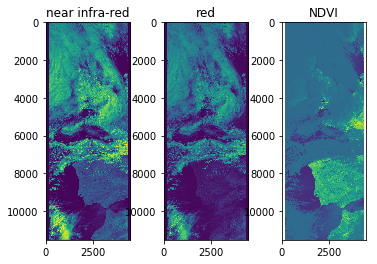

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(nir_data)
ax2.imshow(red_data)
ax3.imshow(ndvi)
ax1.set_title('near infra-red')
ax2.set_title('red')
ax3.set_title('NDVI')
plt.show()